In [2]:
import pandas as pd
import numpy as np
import librosa 

import seaborn as sn
import matplotlib.pyplot as plt
import IPython.display as ipd #palying audio
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
import os
import csv
import soundfile
import sklearn
from matplotlib.colors import Normalize
import glob
from scipy.stats import kurtosis, skew
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_validate
import pickle
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE

In [3]:
path = os.chdir('C:/Users/makye/OneDrive/Documents/Career/BeCode/study/Data_preprocessing/audioProcessing/slider_folder')
print(os.getcwd())

C:\Users\makye\OneDrive\Documents\Career\BeCode\study\Data_preprocessing\audioProcessing\slider_folder


In [4]:
# load dataset

def loadData():
    
    #Pulling the data
    path = 'martin_slider40.csv'
    df = pd.read_csv(path)
    return df

df = loadData()
df


,0,1,2,3,4,5,6,7,8,9,...,226,227,228,229,230,231,232,233,234,target
0,0.436609,0.046511,1.0,0.255715,0.371294,0.022858,1.082787e-16,1.785477,0.093067,0.000290,...,0.973528,2.744807,-3.990591,2.331122,-0.611095,4.406087,-1.407027,3.113171,2.945453,0
1,0.249397,0.009864,1.0,0.263849,0.155273,0.016770,8.026198e-17,2.464548,0.066305,0.000624,...,-6.772698,3.579513,2.393627,8.772600,-1.820199,-2.182059,-13.882417,-4.579430,-1.248085,0
2,0.534312,0.098053,1.0,0.242647,0.501583,0.010063,6.041693e-17,0.650196,0.027597,0.003898,...,1.938308,3.298705,-3.649745,6.483022,-5.493454,6.000850,-4.123596,0.805709,-3.242224,0
3,0.560062,0.082026,1.0,0.239114,0.519424,0.023766,1.248731e-16,2.028489,0.071826,0.000863,...,-2.808863,2.140643,-3.169755,3.558465,-0.887419,1.811249,-2.075843,-0.931246,1.292151,0
4,0.266718,0.004697,1.0,0.280448,0.154983,0.020738,1.023785e-16,3.736622,0.094227,0.000394,...,3.543473,-1.073754,-12.196774,-3.842563,-5.400846,4.640384,3.592001,8.858932,-0.843690,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12277,0.534071,0.018663,1.0,0.264114,0.507881,0.004852,7.205107e-18,3.227674,0.032423,0.000142,...,-0.024094,3.252873,-4.350510,2.347006,-3.818917,-0.819077,-3.625853,-0.121881,-0.525718,1
12278,0.520232,0.017750,1.0,0.263877,0.490247,0.004416,5.956759e-18,4.347354,0.036736,0.000150,...,-1.504628,1.923255,-4.927094,2.058484,-4.101221,-0.589340,-2.327117,1.454738,0.813639,1
12279,0.508658,0.014865,1.0,0.263375,0.466342,0.004530,6.861643e-18,2.081258,0.033195,0.000159,...,-1.163674,2.561445,-4.776084,1.348502,-5.098224,-0.655886,-2.854630,0.311765,-1.172739,1
12280,0.533175,0.011590,1.0,0.262428,0.518011,0.004368,7.170212e-18,3.421806,0.034791,0.000319,...,-1.708191,2.486691,-4.856215,2.889828,-4.021661,1.530425,-2.674900,1.343633,-0.037697,1


In [5]:
#Creating header for features
header = ''

variables = ['chroma_stft', 'mel_spec',  'rms_f',  'spec_cent', 'spec_bw', 'rolloff', 'zcrf']

for i in variables:
    
    header += f' mean_{i}'
    header += f' min_{i}'
    header += f' max_{i}'
    header += f' std_{i}'
    header += f' median_{i}'
    
for i in range(1, 41):
    header += f' mean_mfcc{i}'
        
for i in range(1, 41):
    header += f' min_mfcc{i}'
        
for i in range(1, 41):
    header += f' max_mfcc{i}'
        
for i in range(1, 41):
    header += f' std_mfcc{i}'
        
for i in range(1, 41):
    header += f' median_mfcc{i}'
    
header = header.split()

In [6]:
# Adding header to features

features = df.iloc[:, :-1] #Selecting features
features.columns = header # Adding header to features
features

,mean_chroma_stft,min_chroma_stft,max_chroma_stft,std_chroma_stft,median_chroma_stft,mean_mel_spec,min_mel_spec,max_mel_spec,std_mel_spec,median_mel_spec,...,median_mfcc31,median_mfcc32,median_mfcc33,median_mfcc34,median_mfcc35,median_mfcc36,median_mfcc37,median_mfcc38,median_mfcc39,median_mfcc40
0,0.436609,0.046511,1.0,0.255715,0.371294,0.022858,1.082787e-16,1.785477,0.093067,0.000290,...,1.449268,0.973528,2.744807,-3.990591,2.331122,-0.611095,4.406087,-1.407027,3.113171,2.945453
1,0.249397,0.009864,1.0,0.263849,0.155273,0.016770,8.026198e-17,2.464548,0.066305,0.000624,...,-6.849430,-6.772698,3.579513,2.393627,8.772600,-1.820199,-2.182059,-13.882417,-4.579430,-1.248085
2,0.534312,0.098053,1.0,0.242647,0.501583,0.010063,6.041693e-17,0.650196,0.027597,0.003898,...,0.928216,1.938308,3.298705,-3.649745,6.483022,-5.493454,6.000850,-4.123596,0.805709,-3.242224
3,0.560062,0.082026,1.0,0.239114,0.519424,0.023766,1.248731e-16,2.028489,0.071826,0.000863,...,-0.699413,-2.808863,2.140643,-3.169755,3.558465,-0.887419,1.811249,-2.075843,-0.931246,1.292151
4,0.266718,0.004697,1.0,0.280448,0.154983,0.020738,1.023785e-16,3.736622,0.094227,0.000394,...,9.542062,3.543473,-1.073754,-12.196774,-3.842563,-5.400846,4.640384,3.592001,8.858932,-0.843690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12277,0.534071,0.018663,1.0,0.264114,0.507881,0.004852,7.205107e-18,3.227674,0.032423,0.000142,...,-1.096926,-0.024094,3.252873,-4.350510,2.347006,-3.818917,-0.819077,-3.625853,-0.121881,-0.525718
12278,0.520232,0.017750,1.0,0.263877,0.490247,0.004416,5.956759e-18,4.347354,0.036736,0.000150,...,-1.902235,-1.504628,1.923255,-4.927094,2.058484,-4.101221,-0.589340,-2.327117,1.454738,0.813639
12279,0.508658,0.014865,1.0,0.263375,0.466342,0.004530,6.861643e-18,2.081258,0.033195,0.000159,...,-2.510863,-1.163674,2.561445,-4.776084,1.348502,-5.098224,-0.655886,-2.854630,0.311765,-1.172739
12280,0.533175,0.011590,1.0,0.262428,0.518011,0.004368,7.170212e-18,3.421806,0.034791,0.000319,...,-2.335765,-1.708191,2.486691,-4.856215,2.889828,-4.021661,1.530425,-2.674900,1.343633,-0.037697


In [7]:
#defining features and target/scaling

X = features
y = df.iloc[:, -1]

scaler = StandardScaler()
# keep our unscaled features just in case we need to process them alternatively
X_scaled = scaler.fit_transform(X)

scaler = MinMaxScaler()
# keep our unscaled features just in case we need to process them alternatively
X_minmax = scaler.fit_transform(X)


In [8]:
############# Unscaled test/train set #############
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=42
)

############ Standard Scaled test/train set ###########
# The labels/classes (y_train, y_test) never change, keep old values 
X_train_scaled, X_test_scaled, _, _ = train_test_split(
    X_scaled, 
    y, 
    test_size=0.2, 
    random_state=42
)

############# MinMax Scaled test/train set ###############
# The labels/classes (y_train, y_test) never change, keep old values 
X_train_minmax, X_test_minmax, _, _ = train_test_split(
    X_scaled, 
    y, 
    test_size=0.2, 
    random_state=42
)

In [9]:
#Unscaled:

classification_models = [
    KNeighborsClassifier(),#(3),
    SVC(kernel='linear'),#, C=0.025),
    SVC(kernel='rbf'),
    DecisionTreeClassifier(),#max_depth=5),
    RandomForestClassifier(),#max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

scores = []
for model in classification_models:
    model.fit(X_train, y_train) #Unscaled train
    score = model.score(X_test, y_test) #unscaled test
    model_name = type(model).__name__
    if model_name=='SVC' and model.kernel=='rbf': model_name+=' RBF kernel'
    scores.append((model_name,(f'{100*score:.2f}%')))
# Make it pretty
scores_df = pd.DataFrame(scores,columns=['Classifier','Accuracy Score'])
scores_df.sort_values(by='Accuracy Score',axis=0,ascending=False)

C:\Users\makye\anaconda3\envs\AudioProcessing\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


,Classifier,Accuracy Score
1,SVC,97.64%
4,RandomForestClassifier,97.60%
7,QuadraticDiscriminantAnalysis,96.54%
5,AdaBoostClassifier,96.46%
3,DecisionTreeClassifier,95.03%
0,KNeighborsClassifier,93.89%
2,SVC RBF kernel,88.81%
6,GaussianNB,87.18%


In [9]:
#Scaled
classification_models = [
    KNeighborsClassifier(),#(3),
    SVC(kernel='linear'),#, C=0.025),
    SVC(kernel='rbf'),
    DecisionTreeClassifier(),#max_depth=5),
    RandomForestClassifier(),#max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

scores = []
for model in classification_models:
    model.fit(X_train_scaled, y_train) #scaled train
    score = model.score(X_test_scaled, y_test) #Scaled test
    model_name = type(model).__name__
    if model_name=='SVC' and model.kernel=='rbf': model_name+=' RBF kernel'
    scores.append((model_name,(f'{100*score:.2f}%')))
# Make it pretty
scores_df = pd.DataFrame(scores,columns=['Classifier','Accuracy Score'])
scores_df.sort_values(by='Accuracy Score',axis=0,ascending=False)

C:\Users\makye\anaconda3\envs\AudioProcessing\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


,Classifier,Accuracy Score
2,SVC RBF kernel,98.49%
1,SVC,98.29%
4,RandomForestClassifier,97.76%
0,KNeighborsClassifier,97.35%
5,AdaBoostClassifier,96.46%
3,DecisionTreeClassifier,94.91%
7,QuadraticDiscriminantAnalysis,94.71%
6,GaussianNB,87.99%


In [49]:
#RandomForest Classifier (Scaled features)
classifier = RandomForestClassifier(random_state=42, n_estimators=35)
# classifier  = SVC()
classifier.fit(X_train, y_train) #scaled train
# score = model.score(X_test_scaled, y_test)
y_pred = classifier.predict(X_test)

In [50]:
def Metrics(y_test, y_pred):
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    print(accuracy_score(y_test, y_pred))
    
Metrics(y_test, y_pred)

[[1937    0]
 [  58  462]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1937
           1       1.00      0.89      0.94       520

    accuracy                           0.98      2457
   macro avg       0.99      0.94      0.96      2457
weighted avg       0.98      0.98      0.98      2457

0.9763939763939764


Text(69.0, 0.5, 'True Values')

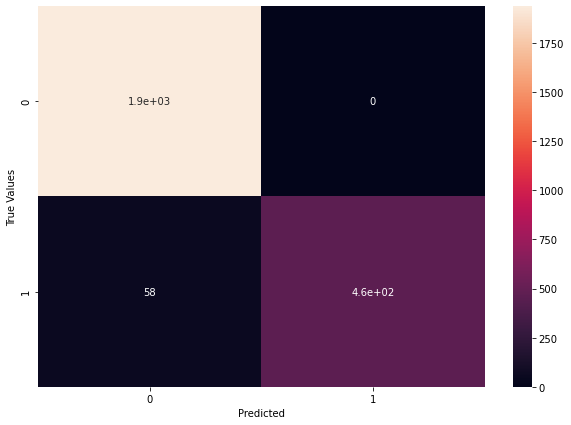

In [51]:
#Plotting confusion matrix
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('True Values')

In [82]:
#Cross Validation????
cv = cross_validate(classifier, X_scaled, y, cv=5)
print(cv['test_score'])
print(cv['test_score'].mean())

[0.47496947 0.86853887 0.96091205 0.9784202  0.95969055]
0.8485062289622551


In [52]:
#Save model
filename = 'finalized_model_sliderRF89USC.sav'
pickle.dump(classifier, open(filename, 'wb'))
 

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00050
Feature: 2, Score: 0.00051
Feature: 3, Score: 0.00056
Feature: 4, Score: 0.00063
Feature: 5, Score: 0.00063
Feature: 6, Score: 0.00065
Feature: 7, Score: 0.00065
Feature: 8, Score: 0.00067
Feature: 9, Score: 0.00068
Feature: 10, Score: 0.00069
Feature: 11, Score: 0.00069
Feature: 12, Score: 0.00069
Feature: 13, Score: 0.00069
Feature: 14, Score: 0.00069
Feature: 15, Score: 0.00071
Feature: 16, Score: 0.00072
Feature: 17, Score: 0.00072
Feature: 18, Score: 0.00073
Feature: 19, Score: 0.00077
Feature: 20, Score: 0.00077
Feature: 21, Score: 0.00078
Feature: 22, Score: 0.00078
Feature: 23, Score: 0.00078
Feature: 24, Score: 0.00079
Feature: 25, Score: 0.00079
Feature: 26, Score: 0.00079
Feature: 27, Score: 0.00081
Feature: 28, Score: 0.00082
Feature: 29, Score: 0.00083
Feature: 30, Score: 0.00083
Feature: 31, Score: 0.00083
Feature: 32, Score: 0.00083
Feature: 33, Score: 0.00087
Feature: 34, Score: 0.00087
Feature: 35, Score: 0.00089
Fe

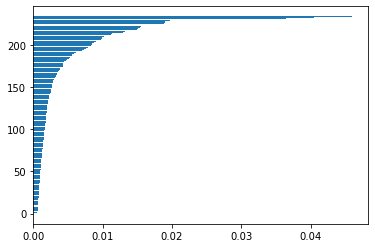

In [98]:
# Calculate & plot Feature importance 
importance = list(classifier.feature_importances_)
importance.sort()

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
plt.barh([x for x in range(len(importance))], importance)
plt.show()

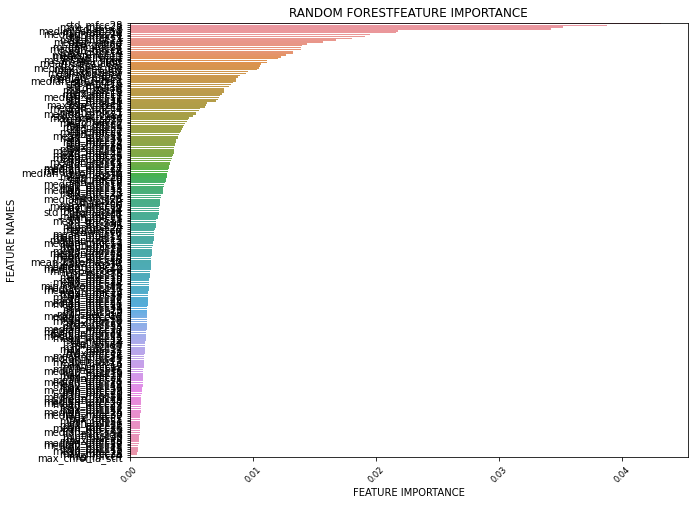

In [55]:
# Calculating and plotting feature importance

def plot_feature_importance(importance,names,model_type):

                #Create arrays from feature importance and feature names
                feature_importance = np.array(importance)
                feature_names = np.array(names)

                #Create a DataFrame using a Dictionary
                data={'feature_names':feature_names,'feature_importance':feature_importance}
                fi_df = pd.DataFrame(data)

                #Sort the DataFrame in order decreasing feature importance
                fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

                #Define size of bar plot
                plt.figure(figsize=(10,8))
                #Plot Searborn bar chart
                sn.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
                #Add chart labels
                plt.tick_params(axis='x', which='major', labelsize= 'small', rotation=45)
                plt.title(model_type + 'FEATURE IMPORTANCE')
                plt.xlabel('FEATURE IMPORTANCE')
                plt.ylabel('FEATURE NAMES')


# calling function
plot_feature_importance(importance, features.columns,'RANDOM FOREST')


In [21]:
# Feature selection by feature importance of random forest classifier

#Selecting important features
sel = SelectFromModel(RandomForestClassifier(n_estimators=35, random_state=42, n_jobs=-1))
sel.fit(X_train, y_train)
sel.get_support()#Returns array of boolean values with importance status

array([False, False, False, False, False,  True, False,  True,  True,
        True,  True, False,  True,  True,  True,  True, False, False,
        True,  True, False, False,  True,  True,  True,  True, False,
        True,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False,  True, False,
        True,  True, False, False,  True, False, False,  True, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False,  True, False,
       False, False, False, False, False,  True, False, False, False,
       False, False,

In [22]:
#Feature columns
X_train.columns

Index(['mean_chroma_stft', 'min_chroma_stft', 'max_chroma_stft',
       'std_chroma_stft', 'median_chroma_stft', 'mean_mel_spec',
       'min_mel_spec', 'max_mel_spec', 'std_mel_spec', 'median_mel_spec',
       ...
       'median_mfcc31', 'median_mfcc32', 'median_mfcc33', 'median_mfcc34',
       'median_mfcc35', 'median_mfcc36', 'median_mfcc37', 'median_mfcc38',
       'median_mfcc39', 'median_mfcc40'],
      dtype='object', length=235)

In [45]:
#retained features
retained = X_train.columns[sel.get_support()]
retained

Index(['mean_mel_spec', 'max_mel_spec', 'std_mel_spec', 'median_mel_spec',
       'mean_rms_f', 'max_rms_f', 'std_rms_f', 'median_rms_f',
       'mean_spec_cent', 'std_spec_cent', 'median_spec_cent', 'max_spec_bw',
       'std_spec_bw', 'median_spec_bw', 'mean_rolloff', 'max_rolloff',
       'std_rolloff', 'median_rolloff', 'mean_mfcc7', 'mean_mfcc11',
       'mean_mfcc22', 'mean_mfcc28', 'mean_mfcc37', 'min_mfcc5', 'min_mfcc7',
       'min_mfcc8', 'min_mfcc11', 'min_mfcc14', 'min_mfcc16', 'min_mfcc34',
       'max_mfcc1', 'max_mfcc8', 'max_mfcc19', 'max_mfcc24', 'max_mfcc28',
       'max_mfcc40', 'std_mfcc4', 'std_mfcc7', 'std_mfcc9', 'std_mfcc11',
       'std_mfcc14', 'std_mfcc16', 'std_mfcc18', 'std_mfcc19', 'std_mfcc20',
       'std_mfcc21', 'std_mfcc24', 'std_mfcc26', 'std_mfcc28', 'std_mfcc38',
       'median_mfcc1', 'median_mfcc2', 'median_mfcc4', 'median_mfcc7',
       'median_mfcc11', 'median_mfcc28'],
      dtype='object')

In [25]:
#Number of retained features
len(retained)

56

In [39]:
# overall mean importance of selected features
print(np.mean(sel.estimator_.feature_importances_))

#features above the mean importance carry more weight
sel.estimator_.feature_importances_

0.00425531914893617


array([0.00106547, 0.00268952, 0.        , 0.00155608, 0.0019607 ,
       0.01170262, 0.        , 0.00518971, 0.00939433, 0.00935949,
       0.01885853, 0.00163752, 0.00798089, 0.03088055, 0.01776713,
       0.0081458 , 0.00107648, 0.00416265, 0.00547831, 0.01849332,
       0.00179272, 0.00088588, 0.0153717 , 0.01069871, 0.04221975,
       0.00897034, 0.00061664, 0.01492885, 0.00915137, 0.01338007,
       0.00157896, 0.00091161, 0.00394614, 0.00411829, 0.00221737,
       0.00341282, 0.00082693, 0.00133451, 0.00287512, 0.00191899,
       0.00110587, 0.00668514, 0.00266757, 0.00074339, 0.00097395,
       0.00974801, 0.001619  , 0.00172078, 0.0022847 , 0.00122404,
       0.00344592, 0.00101206, 0.00123983, 0.00170585, 0.00070419,
       0.0011509 , 0.00430205, 0.00047147, 0.003022  , 0.00099208,
       0.00118931, 0.00132658, 0.01740353, 0.00041034, 0.00174639,
       0.0014944 , 0.00097683, 0.0018345 , 0.0020522 , 0.00112288,
       0.00090777, 0.00445606, 0.0011481 , 0.00137527, 0.00089

In [31]:
#function to call alogarithm for RandomForest
def run_randomForest(X_train, X_test, y_train, y_test):
    clf = RandomForestClassifier(n_estimators=35, random_state=42, n_jobs=-1)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    print('Accuracy:', accuracy_score(y_test, y_pred))

In [38]:
%%time
#Calling function on untrimmed dataset

run_randomForest(X_train, X_test, y_train, y_test)

[[1937    0]
 [  58  462]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1937
           1       1.00      0.89      0.94       520

    accuracy                           0.98      2457
   macro avg       0.99      0.94      0.96      2457
weighted avg       0.98      0.98      0.98      2457

Accuracy: 0.9763939763939764
Wall time: 764 ms


In [47]:
%%time

X_train_rfc = sel.transform(X_train)
X_test_rfc = sel.transform(X_test)

#Calling function on trimmed dataset (with selected features)
run_randomForest(X_train_rfc, X_test_rfc, y_train, y_test)

[[1935    2]
 [  55  465]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1937
           1       1.00      0.89      0.94       520

    accuracy                           0.98      2457
   macro avg       0.98      0.95      0.96      2457
weighted avg       0.98      0.98      0.98      2457

Accuracy: 0.9768009768009768
Wall time: 538 ms


In [ ]:
# RF unscaled and SVC

In [ ]:

# some time later...
 
# # load the model from disk
# loaded_model = pickle.load(open(filename, 'rb'))
# result = loaded

In [62]:
#create overall dataframe 

#Append target to features dataframe
new_df = pd.concat([features, y], axis=1)

#Adding column 'machine ID' (slider = 5)
new_df['Machine_ID'] = 5
new_df


#CSV of dataFrame

def createCsv(df):
    

    df.to_csv('martin_slider40.csv', index=False)
    
createCsv(new_df)
